In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [452]:
train_X = pd.read_excel('train_x_data.xlsx')
train_y = pd.read_excel('train_y_data.xlsx')
test_X = pd.read_excel('test_x_data.xlsx')
test_y = pd.read_excel('test_y_data.xlsx')

train_X

,Commodity,Date,Close,Commodity.1,Date.1,Close.1,Commodity.2,Date.2,Close.2,Commodity.3,...,Close.13,Commodity.14,Date.14,Close.14,Commodity.15,Date.15,Close.15,Commodity.16,Date.16,Close.16
0,Cocoa,2018-01-02,1936,Coffee,2018-01-02,130.199997,Cotton,2018-01-02,77.500000,Sugar,...,3.056,Feeder Cattle,2018-01-02,149.524994,Lean Hogs,2018-01-02,70.724998,Live Cattle,2018-01-02,123.349998
1,Cocoa,2018-01-03,1907,Coffee,2018-01-03,128.600006,Cotton,2018-01-03,78.110001,Sugar,...,3.008,Feeder Cattle,2018-01-03,149.375000,Lean Hogs,2018-01-03,71.050003,Live Cattle,2018-01-03,122.949997
2,Cocoa,2018-01-04,1905,Coffee,2018-01-04,129.550003,Cotton,2018-01-04,79.250000,Sugar,...,2.880,Feeder Cattle,2018-01-04,149.024994,Lean Hogs,2018-01-04,71.375000,Live Cattle,2018-01-04,122.250000
3,Cocoa,2018-01-05,1895,Coffee,2018-01-05,128.449997,Cotton,2018-01-05,78.010002,Sugar,...,2.795,Feeder Cattle,2018-01-05,146.625000,Lean Hogs,2018-01-05,71.425003,Live Cattle,2018-01-05,119.250000
4,Cocoa,2018-01-08,1914,Coffee,2018-01-08,125.150002,Cotton,2018-01-08,78.139999,Sugar,...,2.835,Feeder Cattle,2018-01-08,146.449997,Lean Hogs,2018-01-08,72.974998,Live Cattle,2018-01-08,117.224998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,Cocoa,2023-06-26,3206,Coffee,2023-06-26,167.949997,Cotton,2023-06-26,77.070000,Sugar,...,2.791,Feeder Cattle,2023-06-26,233.675003,Lean Hogs,2023-06-26,93.400002,Live Cattle,2023-06-26,177.699997
1343,Cocoa,2023-06-27,3212,Coffee,2023-06-27,169.449997,Cotton,2023-06-27,77.639999,Sugar,...,2.763,Feeder Cattle,2023-06-27,238.500000,Lean Hogs,2023-06-27,94.125000,Live Cattle,2023-06-27,179.300003
1344,Cocoa,2023-06-28,3292,Coffee,2023-06-28,165.649994,Cotton,2023-06-28,80.120003,Sugar,...,2.603,Feeder Cattle,2023-06-28,240.250000,Lean Hogs,2023-06-28,94.275002,Live Cattle,2023-06-28,179.625000
1345,Cocoa,2023-06-29,3218,Coffee,2023-06-29,163.600006,Cotton,2023-06-29,81.250000,Sugar,...,2.701,Feeder Cattle,2023-06-29,242.375000,Lean Hogs,2023-06-29,95.449997,Live Cattle,2023-06-29,179.750000


In [453]:
# 결측치 확인
print(train_X.isnull().sum())
print(train_y.isnull().sum())
print(test_X.isnull().sum())
print(test_y.isnull().sum())

Commodity       0
Date            0
Close           0
Commodity.1     0
Date.1          0
Close.1         0
Commodity.2     0
Date.2          0
Close.2         0
Commodity.3     0
Date.3          0
Close.3         0
Commodity.4     0
Date.4          0
Close.4         0
Commodity.5     0
Date.5          0
Close.5         0
Commodity.6     0
Date.6          0
Close.6         0
Commodity.7     0
Date.7          0
Close.7         0
Commodity.8     0
Date.8          0
Close.8         0
Commodity.9     0
Date.9          0
Close.9         0
Commodity.10    0
Date.10         0
Close.10        0
Commodity.11    0
Date.11         0
Close.11        0
Commodity.12    0
Date.12         0
Close.12        0
Commodity.13    0
Date.13         0
Close.13        0
Commodity.14    0
Date.14         0
Close.14        0
Commodity.15    0
Date.15         0
Close.15        0
Commodity.16    0
Date.16         0
Close.16        0
dtype: int64
Commodity    0
Date         0
Close        0
dtype: int64
Commodity  

In [454]:
# 3개 단위로 나누기 (예: 'Commodity', 'Date', 'Close')
grouped_train_X_cols = [train_X.columns[i:i+3] for i in range(0, len(train_X.columns), 3)]
grouped_test_X_cols = [test_X.columns[i:i+3] for i in range(0, len(test_X.columns), 3)]
grouped_train_y_cols = [train_y.columns[i:i+3] for i in range(0, len(train_y.columns), 3)]
grouped_test_y_cols = [test_y.columns[i:i+3] for i in range(0, len(test_y.columns), 3)]
grouped_train_X_cols

[Index(['Commodity', 'Date', 'Close'], dtype='object'),
 Index(['Commodity.1', 'Date.1', 'Close.1'], dtype='object'),
 Index(['Commodity.2', 'Date.2', 'Close.2'], dtype='object'),
 Index(['Commodity.3', 'Date.3', 'Close.3'], dtype='object'),
 Index(['Commodity.4', 'Date.4', 'Close.4'], dtype='object'),
 Index(['Commodity.5', 'Date.5', 'Close.5'], dtype='object'),
 Index(['Commodity.6', 'Date.6', 'Close.6'], dtype='object'),
 Index(['Commodity.7', 'Date.7', 'Close.7'], dtype='object'),
 Index(['Commodity.8', 'Date.8', 'Close.8'], dtype='object'),
 Index(['Commodity.9', 'Date.9', 'Close.9'], dtype='object'),
 Index(['Commodity.10', 'Date.10', 'Close.10'], dtype='object'),
 Index(['Commodity.11', 'Date.11', 'Close.11'], dtype='object'),
 Index(['Commodity.12', 'Date.12', 'Close.12'], dtype='object'),
 Index(['Commodity.13', 'Date.13', 'Close.13'], dtype='object'),
 Index(['Commodity.14', 'Date.14', 'Close.14'], dtype='object'),
 Index(['Commodity.15', 'Date.15', 'Close.15'], dtype='object

In [455]:
# Long Format으로 변환
long_train_X_data = []
long_test_X_data = []

for group in grouped_train_X_cols:
    temp = train_X[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_train_X_data.append(temp)

# 모든 그룹을 하나로 합치기
long_train_X = pd.concat(long_train_X_data, ignore_index=True)

for group in grouped_test_X_cols:
    temp = test_X[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_test_X_data.append(temp)

# 모든 그룹을 하나로 합치기
long_test_X = pd.concat(long_test_X_data, ignore_index=True)

# 결과 확인
long_train_X.head()


,Commodity,Date,Close
0,Cocoa,2018-01-02,1936.0
1,Cocoa,2018-01-03,1907.0
2,Cocoa,2018-01-04,1905.0
3,Cocoa,2018-01-05,1895.0
4,Cocoa,2018-01-08,1914.0


In [456]:
# Long Format으로 변환
long_train_y_data = []
long_test_y_data = []

for group in grouped_train_y_cols:
    temp = train_y[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_train_y_data.append(temp)

# 모든 그룹을 하나로 합치기
long_train_y = pd.concat(long_train_y_data, ignore_index=True)

for group in grouped_test_y_cols:
    temp = test_y[group]
    temp.columns = ['Commodity', 'Date', 'Close']  # 열 이름을 통일
    long_test_y_data.append(temp)

# 모든 그룹을 하나로 합치기
long_test_y = pd.concat(long_test_y_data, ignore_index=True)

# 결과 확인
long_train_y.head()

,Commodity,Date,Close
0,Brent Crude Oil,2018-01-02,66.570000
1,Brent Crude Oil,2018-01-03,67.839996
2,Brent Crude Oil,2018-01-04,68.070000
3,Brent Crude Oil,2018-01-05,67.620003
4,Brent Crude Oil,2018-01-08,67.779999


In [457]:
# 날짜 형식 변환
long_train_X['Date'] = pd.to_datetime(long_train_X['Date'])
long_test_X['Date'] = pd.to_datetime(long_test_X['Date'])
long_train_y['Date'] = pd.to_datetime(long_train_y['Date'])
long_test_y['Date'] = pd.to_datetime(long_test_y['Date'])

# 중복 제거
long_train_X = long_train_X.drop_duplicates()
long_test_X = long_test_X.drop_duplicates()
long_train_y = long_train_y.drop_duplicates()
long_test_y = long_test_y.drop_duplicates()

# 결과 확인
long_train_X

,Commodity,Date,Close
0,Cocoa,2018-01-02,1936.000000
1,Cocoa,2018-01-03,1907.000000
2,Cocoa,2018-01-04,1905.000000
3,Cocoa,2018-01-05,1895.000000
4,Cocoa,2018-01-08,1914.000000
...,...,...,...
22894,Live Cattle,2023-06-26,177.699997
22895,Live Cattle,2023-06-27,179.300003
22896,Live Cattle,2023-06-28,179.625000
22897,Live Cattle,2023-06-29,179.750000


In [458]:
# Date 기준 정렬
long_train_X = long_train_X.sort_values(by='Date')
long_test_X = long_train_X.sort_values(by='Date')
long_train_y = long_train_y.sort_values(by='Date')
long_test_y = long_train_y.sort_values(by='Date')

# 결과 확인
long_train_X

,Commodity,Date,Close
0,Cocoa,2018-01-02,1936.000000
16164,Silver,2018-01-02,17.121000
21552,Live Cattle,2018-01-02,123.349998
1347,Coffee,2018-01-02,130.199997
2694,Cotton,2018-01-02,77.500000
...,...,...,...
2693,Coffee,2023-06-30,161.000000
20204,Feeder Cattle,2023-06-30,247.574997
21551,Lean Hogs,2023-06-30,95.650002
8081,Rough Rice,2023-06-30,1805.500000


In [459]:
# Date를 인덱스로 설정하고 Pivot
pivot_train_X = long_train_X.pivot(index='Date', columns='Commodity', values='Close')
pivot_test_X = long_test_X.pivot(index='Date', columns='Commodity', values='Close')
pivot_train_y = long_train_y.pivot(index='Date', columns='Commodity', values='Close')
pivot_test_y = long_test_y.pivot(index='Date', columns='Commodity', values='Close')

# MultiIndex 제거
pivot_train_X.columns.name = None
pivot_train_X = pivot_train_X.reset_index()
pivot_train_y.columns.name = None
pivot_train_y = pivot_train_y.reset_index()
pivot_test_X.columns.name = None
pivot_test_X = pivot_test_X.reset_index()
pivot_test_y.columns.name = None
pivot_test_y = pivot_test_y.reset_index()

# 결과 확인
pivot_train_X.head()

,Date,Cocoa,Coffee,Copper,Cotton,Feeder Cattle,Gold,Kansas Wheat,Lean Hogs,Live Cattle,Natural Gas,Oats,Palladium,Platinum,Rough Rice,Silver,Soybeans,Sugar
0,2018-01-02,1936.0,130.199997,3.2560,77.500000,149.524994,1313.699951,434.75,70.724998,123.349998,3.056,242.50,1090.000000,943.799988,1153.5,17.121000,955.00,15.33
1,2018-01-03,1907.0,128.600006,3.2370,78.110001,149.375000,1316.199951,441.00,71.050003,122.949997,3.008,244.50,1086.000000,957.799988,1141.0,17.184999,959.75,15.31
2,2018-01-04,1905.0,129.550003,3.2425,79.250000,149.024994,1319.400024,439.75,71.375000,122.250000,2.880,245.75,1097.400024,966.099976,1147.5,17.188999,959.25,15.25
3,2018-01-05,1895.0,128.449997,3.2070,78.010002,146.625000,1320.300049,437.50,71.425003,119.250000,2.795,248.50,1084.849976,971.200012,1156.5,17.205000,961.50,15.08
4,2018-01-08,1914.0,125.150002,3.2010,78.139999,146.449997,1318.599976,433.25,72.974998,117.224998,2.835,250.00,1098.550049,972.299988,1164.5,17.063999,958.25,14.78


In [460]:
print(pivot_train_X.columns)
print(pivot_test_X.columns)
print(pivot_train_y.columns)
print(pivot_test_y.columns)
pivot_train_y.head()

Index(['Date', 'Cocoa', 'Coffee', 'Copper', 'Cotton', 'Feeder Cattle', 'Gold',
       'Kansas Wheat', 'Lean Hogs', 'Live Cattle', 'Natural Gas', 'Oats',
       'Palladium', 'Platinum', 'Rough Rice', 'Silver', 'Soybeans', 'Sugar'],
      dtype='object')
Index(['Date', 'Cocoa', 'Coffee', 'Copper', 'Cotton', 'Feeder Cattle', 'Gold',
       'Kansas Wheat', 'Lean Hogs', 'Live Cattle', 'Natural Gas', 'Oats',
       'Palladium', 'Platinum', 'Rough Rice', 'Silver', 'Soybeans', 'Sugar'],
      dtype='object')
Index(['Date', 'Brent Crude Oil'], dtype='object')
Index(['Date', 'Brent Crude Oil'], dtype='object')


,Date,Brent Crude Oil
0,2018-01-02,66.570000
1,2018-01-03,67.839996
2,2018-01-04,68.070000
3,2018-01-05,67.620003
4,2018-01-08,67.779999


In [461]:
pivot_test_X.reset_index(inplace=True)
pivot_train_X.reset_index(inplace=True)
pivot_test_y.reset_index(inplace=True)
pivot_train_y.reset_index(inplace=True)

pivot_train_X.drop('Date',axis=1, inplace=True)
pivot_test_X.drop('Date',axis=1, inplace=True)
pivot_train_y.drop('Date',axis=1, inplace=True)
pivot_test_y.drop('Date',axis=1, inplace=True)

pivot_train_y.head()

,index,Brent Crude Oil
0,0,66.570000
1,1,67.839996
2,2,68.070000
3,3,67.620003
4,4,67.779999


In [462]:
# 'index' 열 삭제
pivot_train_X.drop('index', axis=1, inplace=True)
pivot_test_X.drop('index', axis=1, inplace=True)
pivot_train_y.drop('index', axis=1, inplace=True)
pivot_test_y.drop('index', axis=1, inplace=True)

# 결과 확인
pivot_train_y.head()

,Brent Crude Oil
0,66.570000
1,67.839996
2,68.070000
3,67.620003
4,67.779999


In [463]:
# 데이터 통합
train_data = pd.concat([pivot_train_X, pivot_train_y], axis=1)
test_data = pd.concat([pivot_test_X, pivot_test_y], axis=1)

# 상관관계 계산
correlation = train_data.corr()

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation['Brent Crude Oil'].sort_values(ascending=False)
print("타겟 변수와의 상관관계:\n", correlation_with_target)

# 상관관계 계산
correlation = train_data.corr()

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation['Brent Crude Oil'].sort_values(ascending=False)
print("타겟 변수와의 상관관계:\n", correlation_with_target)


타겟 변수와의 상관관계:
 Brent Crude Oil    1.000000
Cotton             0.819240
Kansas Wheat       0.782843
Natural Gas        0.745098
Coffee             0.731278
Soybeans           0.687027
Lean Hogs          0.672630
Live Cattle        0.638459
Copper             0.620224
Oats               0.613573
Feeder Cattle      0.594026
Sugar              0.584207
Rough Rice         0.415543
Platinum           0.270246
Silver             0.176611
Gold               0.127774
Cocoa              0.085087
Palladium         -0.030591
Name: Brent Crude Oil, dtype: float64
타겟 변수와의 상관관계:
 Brent Crude Oil    1.000000
Cotton             0.819240
Kansas Wheat       0.782843
Natural Gas        0.745098
Coffee             0.731278
Soybeans           0.687027
Lean Hogs          0.672630
Live Cattle        0.638459
Copper             0.620224
Oats               0.613573
Feeder Cattle      0.594026
Sugar              0.584207
Rough Rice         0.415543
Platinum           0.270246
Silver             0.176611
Gold    

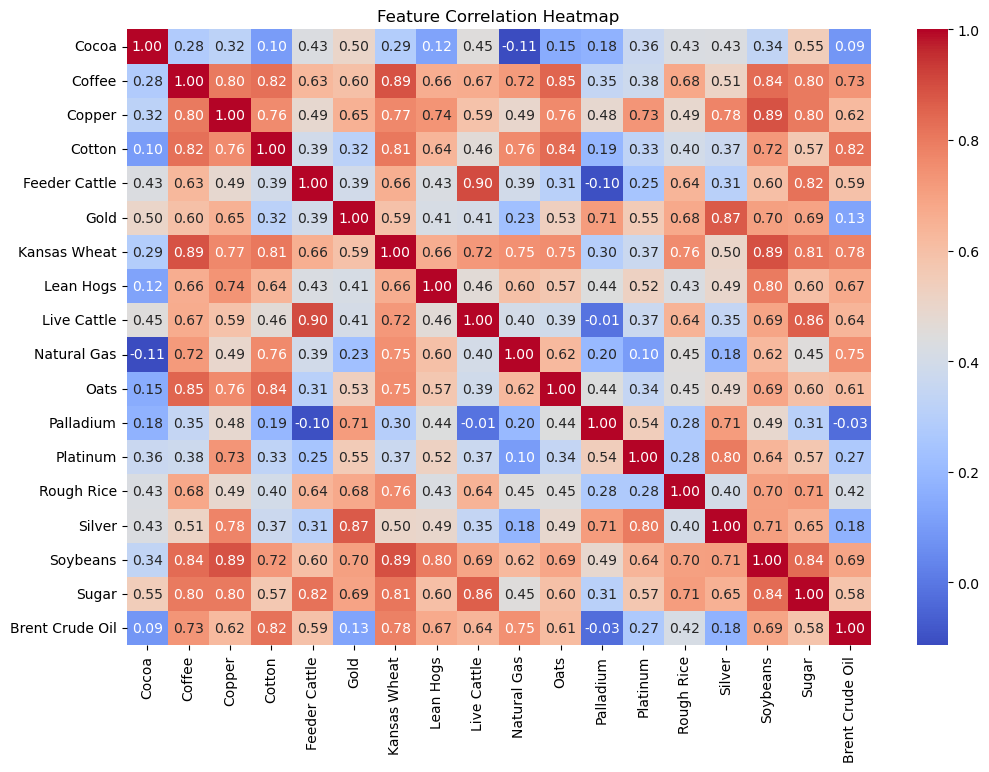

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [465]:
# 타겟 변수 제외한 상관관계 기반 Feature Selection
threshold=0.6
correlation_with_target = correlation['Brent Crude Oil'].drop(labels=['Brent Crude Oil'])
selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()

print("선택된 변수들:", selected_features)

선택된 변수들: ['Coffee', 'Copper', 'Cotton', 'Kansas Wheat', 'Lean Hogs', 'Live Cattle', 'Natural Gas', 'Oats', 'Soybeans']


In [466]:
# 피처 셀렉션
pivot_train_X=pivot_train_X[selected_features]
pivot_test_X=pivot_test_X[selected_features]

pivot_test_X

,Coffee,Copper,Cotton,Kansas Wheat,Lean Hogs,Live Cattle,Natural Gas,Oats,Soybeans
0,130.199997,3.2560,77.500000,434.75,70.724998,123.349998,3.056,242.50,955.00
1,128.600006,3.2370,78.110001,441.00,71.050003,122.949997,3.008,244.50,959.75
2,129.550003,3.2425,79.250000,439.75,71.375000,122.250000,2.880,245.75,959.25
3,128.449997,3.2070,78.010002,437.50,71.425003,119.250000,2.795,248.50,961.50
4,125.150002,3.2010,78.139999,433.25,72.974998,117.224998,2.835,250.00,958.25
...,...,...,...,...,...,...,...,...,...
1342,167.949997,3.7865,77.070000,866.50,93.400002,177.699997,2.791,391.25,1521.00
1343,169.449997,3.7815,77.639999,837.75,94.125000,179.300003,2.763,385.00,1495.00
1344,165.649994,3.7205,80.120003,800.75,94.275002,179.625000,2.603,377.00,1451.00
1345,163.600006,3.6775,81.250000,794.25,95.449997,179.750000,2.701,367.75,1483.00


In [467]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
pivot_train_X_scaled = scaler.fit_transform(pivot_train_X)
pivot_test_X_scaled = scaler.transform(pivot_test_X)
pivot_train_y_scaled = scaler.fit_transform(pivot_train_y)
pivot_test_y_scaled = scaler.transform(pivot_test_y)

# 표준화된 결과 확인
print(pivot_train_X_scaled[:5])  # 첫 5개 행 출력

[[-0.31896259 -0.19448044 -0.30428429 -0.95273171 -0.350508   -0.05303156
  -0.25792155 -0.90395425 -0.74203782]
 [-0.35243856 -0.22114479 -0.27476546 -0.92318337 -0.33254535 -0.07342589
  -0.28513215 -0.89014585 -0.72563201]
 [-0.33256215 -0.21342607 -0.21959921 -0.92909304 -0.31458312 -0.10911567
  -0.35769349 -0.8815156  -0.72735893]
 [-0.35557715 -0.26324623 -0.27960453 -0.93973044 -0.31181951 -0.26207253
  -0.40587886 -0.86252905 -0.71958776]
 [-0.42462164 -0.27166659 -0.27331378 -0.95982332 -0.22615294 -0.36531849
  -0.38320342 -0.85217275 -0.73081279]]


## 윈도우 크기 결정

In [468]:
def create_windows(X, y, window_size):
    X_windows, y_windows = [], []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])  # .iloc 대신 기본 인덱싱 사용
        y_windows.append(y[i + window_size])    # .iloc 대신 기본 인덱싱 사용
    return np.array(X_windows), np.array(y_windows)

In [469]:
# 윈도우 크기
window_size = 30

# Train 데이터 슬라이싱
X_train, y_train = create_windows(
    pivot_train_X_scaled,  
    pivot_train_y_scaled,  
    window_size
)

# Test 데이터 슬라이싱
X_test, y_test = create_windows(
    pivot_test_X_scaled,  
    pivot_test_y_scaled,  
    window_size
)

# 결과 확인
print(f"Train X Shape: {X_train.shape}, Train y Shape: {y_train.shape}")
print(f"Test X Shape: {X_test.shape}, Test y Shape: {y_test.shape}")

Train X Shape: (1317, 30, 9), Train y Shape: (1317, 1)
Test X Shape: (1317, 30, 9), Test y Shape: (1317, 1)


In [470]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU
from tensorflow.keras import backend as K

# RMSE 정의
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# LSTM과 GRU 혼합 모델
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(window_size, X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='tanh'),  # 추가 Dense 레이어
    Dense(y_train.shape[1])  # 출력 레이어 (타겟 변수 개수에 맞춤)
])

# 모델 컴파일 (loss에 rmse 사용)
model.compile(optimizer='adam', loss='mse', metrics=[rmse, 'mae'])

In [471]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,  # 에포크 조정
    batch_size=128,  # 배치 크기 조정
    verbose=1
)

Epoch 1/300
11/11 [==============================] - 5s 135ms/step - loss: 0.4772 - rmse: 0.6641 - mae: 0.5495 - val_loss: 0.2583 - val_rmse: 0.4646 - val_mae: 0.3993
Epoch 2/300
11/11 [==============================] - 0s 47ms/step - loss: 0.2143 - rmse: 0.4584 - mae: 0.3491 - val_loss: 0.1544 - val_rmse: 0.3671 - val_mae: 0.3051
Epoch 3/300
11/11 [==============================] - 0s 47ms/step - loss: 0.1417 - rmse: 0.3711 - mae: 0.2904 - val_loss: 0.1156 - val_rmse: 0.3214 - val_mae: 0.2644
Epoch 4/300
11/11 [==============================] - 1s 47ms/step - loss: 0.1106 - rmse: 0.3310 - mae: 0.2590 - val_loss: 0.1011 - val_rmse: 0.3037 - val_mae: 0.2480
Epoch 5/300
11/11 [==============================] - 1s 47ms/step - loss: 0.0955 - rmse: 0.3097 - mae: 0.2361 - val_loss: 0.0858 - val_rmse: 0.2828 - val_mae: 0.2317
Epoch 6/300
11/11 [==============================] - 0s 47ms/step - loss: 0.0837 - rmse: 0.2879 - mae: 0.2237 - val_loss: 0.0665 - val_rmse: 0.2480 - val_mae: 0.2019
Epo

In [472]:
# 모델 평가
loss, rmse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test RMSE: {rmse}, Test MAE: {mae}")

Test Loss: 0.004856943152844906, Test RMSE: 0.06494193524122238, Test MAE: 0.051672760397195816


42/42 [==============================] - 1s 8ms/step


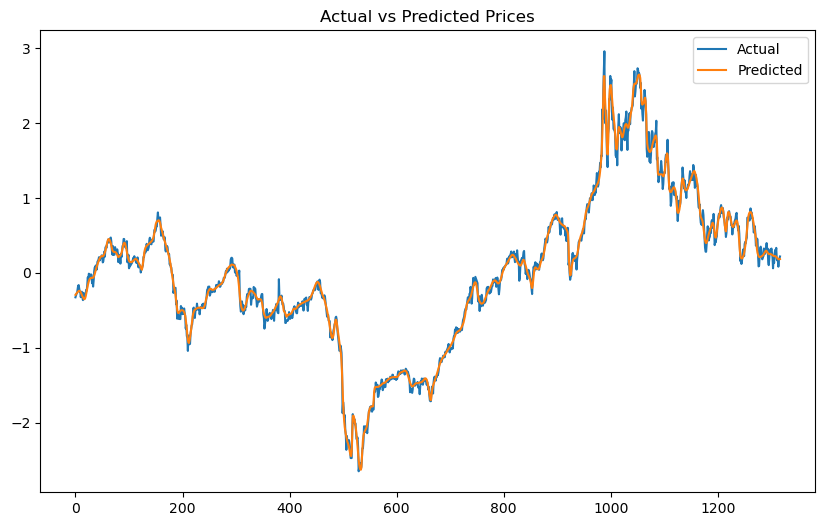

In [473]:
# 예측
y_pred = model.predict(X_test)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()